# Working with Custom Images


## The Data

The dataset includes 25,000 images of cats and dogs. We will be building a classifier that works with these images and attempt to detect dogs versus cats!

The pictures are numbered 0-12499 for both cats and dogs, thus we have 12,500 images of Dogs and 12,500 images of Cats. This is a huge dataset!!

--------

**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. **

### Visualizing the Data


In [36]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

import warnings
warnings.filterwarnings('ignore')
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [52]:
cat = cv2.imread('CATS_DOGS/CATS_DOGS/train/CAT/5.jpg')
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

In [53]:
type(cat)

numpy.ndarray

In [54]:
cat.shape

(144, 176, 3)

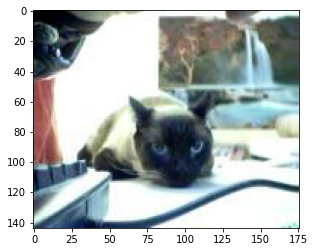

In [55]:
plt.imshow(cat)

In [56]:
dog= cv2.imread('CATS_DOGS/CATS_DOGS/train/DOG/5.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

In [57]:
dog.shape

(376, 500, 3)

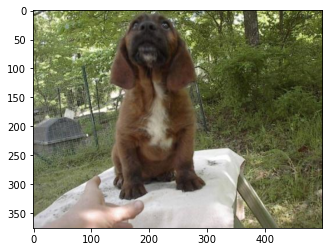

In [58]:
plt.imshow(dog)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [171]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

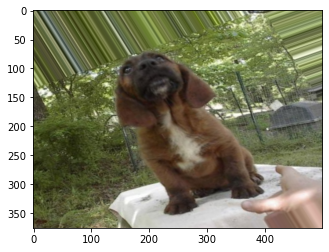

In [60]:
plt.imshow(image_gen.random_transform(dog))

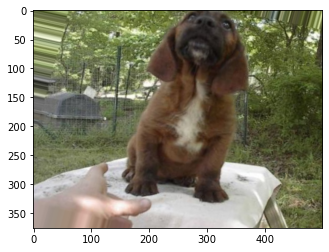

In [61]:
plt.imshow(image_gen.random_transform(dog))

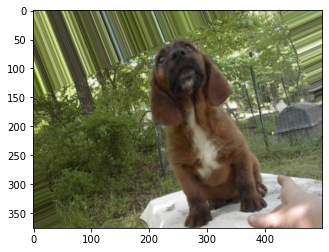

In [62]:
plt.imshow(image_gen.random_transform(dog))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [63]:
image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [64]:
image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [65]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [67]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

### Training the Model

In [70]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [71]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [72]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [75]:
results = model.fit_generator(train_image_gen,epochs=150,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/150
150/150 [==============================] - 113s 746ms/step - loss: 0.6939 - accuracy: 0.5238 - val_loss: 0.6863 - val_accuracy: 0.5469
Epoch 2/150
150/150 [==============================] - 101s 675ms/step - loss: 0.6949 - accuracy: 0.5200 - val_loss: 0.6901 - val_accuracy: 0.5469
Epoch 3/150
150/150 [==============================] - 112s 747ms/step - loss: 0.6871 - accuracy: 0.5479 - val_loss: 0.6836 - val_accuracy: 0.5365
Epoch 4/150
150/150 [==============================] - 142s 945ms/step - loss: 0.6812 - accuracy: 0.5813 - val_loss: 0.6604 - val_accuracy: 0.6094
Epoch 5/150
150/150 [==============================] - 116s 771ms/step - loss: 0.6796 - accuracy: 0.5888 - val_loss: 0.7412 - val_accuracy: 0.5260
Epoch 6/150
150/150 [==============================] - 144s 957ms/step - loss: 0.6703 - accuracy: 0.5892 - val_loss: 0.6284 - val_accuracy: 0.6302
Epoch 7/150
150/150 [==============================] - 142s 942ms/step - loss: 0.6574 - accuracy: 0.6133 - val_loss: 0

150/150 [==============================] - 195s 1s/step - loss: 0.4374 - accuracy: 0.8117 - val_loss: 0.3886 - val_accuracy: 0.8281
Epoch 58/150
150/150 [==============================] - 169s 1s/step - loss: 0.4291 - accuracy: 0.8054 - val_loss: 0.4488 - val_accuracy: 0.8073
Epoch 59/150
150/150 [==============================] - 212s 1s/step - loss: 0.4423 - accuracy: 0.7892 - val_loss: 0.4555 - val_accuracy: 0.7812
Epoch 60/150
150/150 [==============================] - 191s 1s/step - loss: 0.4309 - accuracy: 0.8054 - val_loss: 0.4552 - val_accuracy: 0.8073
Epoch 61/150
150/150 [==============================] - 184s 1s/step - loss: 0.4313 - accuracy: 0.8043 - val_loss: 0.3676 - val_accuracy: 0.8438
Epoch 62/150
150/150 [==============================] - 177s 1s/step - loss: 0.4011 - accuracy: 0.8238 - val_loss: 0.3830 - val_accuracy: 0.8438
Epoch 63/150
150/150 [==============================] - 195s 1s/step - loss: 0.4283 - accuracy: 0.8017 - val_loss: 0.3794 - val_accuracy: 0.854

Epoch 113/150
150/150 [==============================] - 154s 1s/step - loss: 0.3176 - accuracy: 0.8612 - val_loss: 0.2863 - val_accuracy: 0.8854
Epoch 114/150
150/150 [==============================] - 145s 963ms/step - loss: 0.3346 - accuracy: 0.8621 - val_loss: 0.3050 - val_accuracy: 0.8594
Epoch 115/150
150/150 [==============================] - 150s 999ms/step - loss: 0.3572 - accuracy: 0.8417 - val_loss: 0.3830 - val_accuracy: 0.8385
Epoch 116/150
150/150 [==============================] - 150s 1s/step - loss: 0.3563 - accuracy: 0.8479 - val_loss: 0.3797 - val_accuracy: 0.8229
Epoch 117/150
150/150 [==============================] - 149s 995ms/step - loss: 0.3477 - accuracy: 0.8532 - val_loss: 0.3289 - val_accuracy: 0.8385
Epoch 118/150
150/150 [==============================] - 180s 1s/step - loss: 0.3447 - accuracy: 0.8496 - val_loss: 0.3587 - val_accuracy: 0.8333
Epoch 119/150
150/150 [==============================] - 147s 980ms/step - loss: 0.3437 - accuracy: 0.8562 - val_lo

In [ ]:
# model.save('cat_dog2.h5')

# Evaluating the Model

In [77]:
results.history['accuracy']

[0.5237500071525574,
 0.5199999809265137,
 0.547887921333313,
 0.581250011920929,
 0.5887500047683716,
 0.5891666412353516,
 0.6133333444595337,
 0.6575000286102295,
 0.6470096111297607,
 0.659583330154419,
 0.6775407791137695,
 0.6762499809265137,
 0.6854872703552246,
 0.6995833516120911,
 0.7012500166893005,
 0.720200777053833,
 0.737500011920929,
 0.7245833277702332,
 0.7283333539962769,
 0.7386031150817871,
 0.7416666746139526,
 0.7454166412353516,
 0.7483333349227905,
 0.76541668176651,
 0.7624424695968628,
 0.7520833611488342,
 0.762499988079071,
 0.7604166865348816,
 0.7616666555404663,
 0.7745833396911621,
 0.7704166769981384,
 0.7720833420753479,
 0.7858333587646484,
 0.7745833396911621,
 0.7766666412353516,
 0.7724999785423279,
 0.784166693687439,
 0.7724999785423279,
 0.7820833325386047,
 0.7925000190734863,
 0.7774999737739563,
 0.7695833444595337,
 0.7908824682235718,
 0.7991666793823242,
 0.7854166626930237,
 0.7933333516120911,
 0.7958333492279053,
 0.7975000143051147,
 

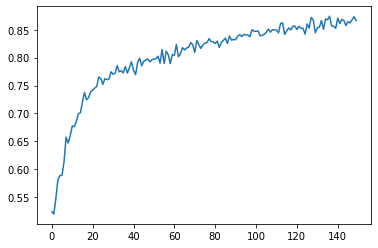

In [78]:
plt.plot(results.history['accuracy'])

In [ ]:
# model.save('cat_dog_100epochs.h5')

# Predicting on new images

In [79]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [165]:
dog_file = 'CATS_DOGS/CATS_DOGS/test/DOG/9417.jpg'


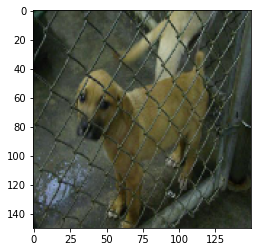

In [166]:
dog_image=tf.keras.utils.load_img(dog_file, target_size=(150,150))
plt.imshow(dog_image)
dog_image=tf.keras.utils.img_to_array(dog_image)

In [167]:
print (type(dog_image))
dog_image.shape
dog_img=np.expand_dims(dog_image, axis=0)
dog_img.shape

<class 'numpy.ndarray'>


(1, 150, 150, 3)

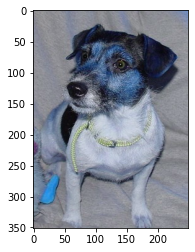

In [122]:
#import cv2
 
#image = cv2.imread('CATS_DOGS/CATS_DOGS/test/DOG/9374.jpg')
 
#plt.imshow(image)

In [123]:
# BGR -> RGB
#img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
#cv2.imwrite('opncv_sample.png', img)
#print (type(img))

<class 'numpy.ndarray'>


In [168]:
prediction_dog = model.predict(dog_img)

1/1 [==============================] - 0s 54ms/step


In [169]:
# Output prediction
def cat_or_dog(prob):
    if prob==1:
        print("It is a dog")
    else:
        print('It is a cat ')
    return


In [170]:
cat_or_dog(prediction_dog)

It is a dog


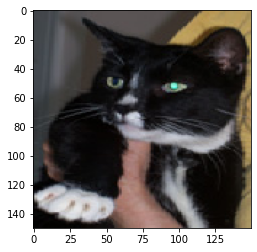

In [161]:
cat_file = 'CATS_DOGS/CATS_DOGS/test/cat/9376.jpg'
cat_image=tf.keras.utils.load_img(cat_file, target_size=(150,150))
plt.imshow(cat_image)
dog_image=tf.keras.utils.img_to_array(cat_image)


In [162]:
print (type(cat_image))

cat_img=np.expand_dims(cat_image, axis=0)
print(cat_img.shape)

<class 'PIL.Image.Image'>
(1, 150, 150, 3)


In [163]:
prediction_cat = model.predict(cat_img)
print(prediction_cat)

1/1 [==============================] - 0s 65ms/step
[[1.374655e-23]]


In [164]:
cat_or_dog(prediction_cat)

It is a cat 


The model predicted the images as dog and cat which is the correct prediction.

# Thank you!